<a href="https://colab.research.google.com/github/DarioN100/prueba-09-03/blob/main/PortafolioDario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [4]:
ruta='/content/Online_Retail.csv'
df=pd.read_csv(ruta,encoding='latin-1')
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  


In [6]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
df.duplicated().sum()

np.int64(5268)

In [11]:
valores_unicos={col:df[col].unique() for col in df.columns if col == 'Country'}
for col,valores in valores_unicos.items():
  print(f'Columna: {col}')
  print(f'numero de valores unicos: {len(valores)}')
  print(f'Valores únicos: {valores[:10]}')
  print('-' * 50)

Columna: Country
numero de valores unicos: 38
Valores únicos: ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland']
--------------------------------------------------


In [12]:
datos_limpios=df.drop_duplicates()
datos_limpios=datos_limpios.dropna(subset=['CustomerID'])

In [14]:
datos_limpios.duplicated().sum()

np.int64(0)

In [15]:
datos_limpios.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [16]:
datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [17]:
datos_limpios['InvoiceDate']=pd.to_datetime(datos_limpios['InvoiceDate'])
datos_limpios.info()

<ipython-input-17-b4f1954be270>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  datos_limpios['InvoiceDate']=pd.to_datetime(datos_limpios['InvoiceDate'])


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [18]:
datos_limpios['Año']=datos_limpios['InvoiceDate'].dt.year
datos_limpios['Mes']=datos_limpios['InvoiceDate'].dt.month
datos_limpios.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [58]:
datos_limpios['Monto_total']=datos_limpios['Quantity'] * datos_limpios['UnitPrice']
datos_limpios.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes,ventas_totales,semestre,Trimestre,Monto_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,2,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,2,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,2,4,20.34


In [59]:
datos_limpios.drop(columns=['ventas_totales'],inplace=True)
datos_limpios.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes,semestre,Trimestre,Monto_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34


In [60]:
ventas_por_año=datos_limpios.groupby('Año')['Monto_total'].sum()
ventas_por_año

,Monto_total
Año,
2010,552372.860
2011,7726146.564


In [61]:
datos_limpios['semestre']=datos_limpios['Mes'].apply(lambda x:1 if x<=6 else 2)
datos_limpios.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes,semestre,Trimestre,Monto_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34


In [62]:
ventas_por_semestre=datos_limpios.groupby(['Año','semestre'])['Monto_total'].sum()
ventas_por_semestre

Año   semestre
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: Monto_total, dtype: float64

In [63]:
datos_limpios.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes,semestre,Trimestre,Monto_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34


In [64]:
datos_limpios['Trimestre']=datos_limpios['Mes'].apply(lambda x:1 if x<=3 else (2 if x<=6 else(3 if x<=9 else 4)))
datos_limpios.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes,semestre,Trimestre,Monto_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34


In [66]:
ventas_por_Trimestre=datos_limpios.groupby(['Año', 'Trimestre'])['Monto_total'].sum()
ventas_por_Trimestre

Año   Trimestre
2010  4             552372.860
2011  1            1487842.180
      2            1679096.861
      3            2117546.643
      4            2441660.880
Name: Monto_total, dtype: float64

In [67]:
ventas_por_mes=datos_limpios.groupby(['Año','Mes'])['Monto_total'].sum()
ventas_por_mes

Año   Mes
2010  12      552372.860
2011  1       473731.900
      2       435534.070
      3       578576.210
      4       425222.671
      5       647011.670
      6       606862.520
      7       573112.321
      8       615078.090
      9       929356.232
      10      973306.380
      11     1126815.070
      12      341539.430
Name: Monto_total, dtype: float64

In [68]:
Total_devoluciones=datos_limpios[datos_limpios['Quantity'] < 0].shape[0]
Total_devoluciones

8872

In [69]:
Total__no_devoluciones=datos_limpios[datos_limpios['Quantity'] >= 0].shape[0]
Total__no_devoluciones

392732

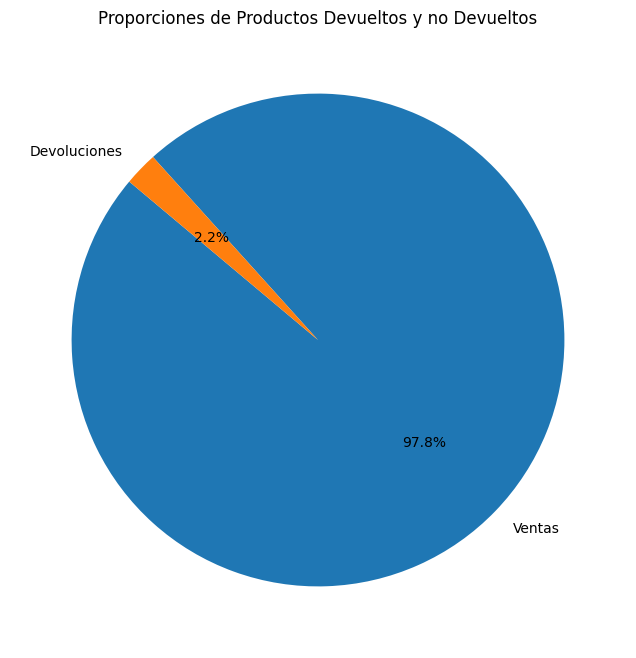

In [70]:
import matplotlib.pyplot as plt

labels=['Ventas','Devoluciones']
sizes=[Total__no_devoluciones,Total_devoluciones]
colors=['lightgreen','lightcoral']

plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=140)
plt.title('Proporciones de Productos Devueltos y no Devueltos')
plt.show()


In [71]:
datos_limpios.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Año,Mes,semestre,Trimestre,Monto_total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,2,4,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,2,4,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,2,4,20.34


In [73]:
def Categoria_monto (monto):
  if monto < 20:
    return 'Bajo'
  elif monto >= 20 and monto < 100:
    return 'Medio'
  else:
    return 'Alto'
datos_limpios['Categoria_monto']=datos_limpios['Monto_total'].apply(Categoria_monto)
print(datos_limpios.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country   Año  Mes  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   12   

   semestre  Trimestre  Monto_total Categoria_monto  
0         2          4        15.30            Bajo  
1       

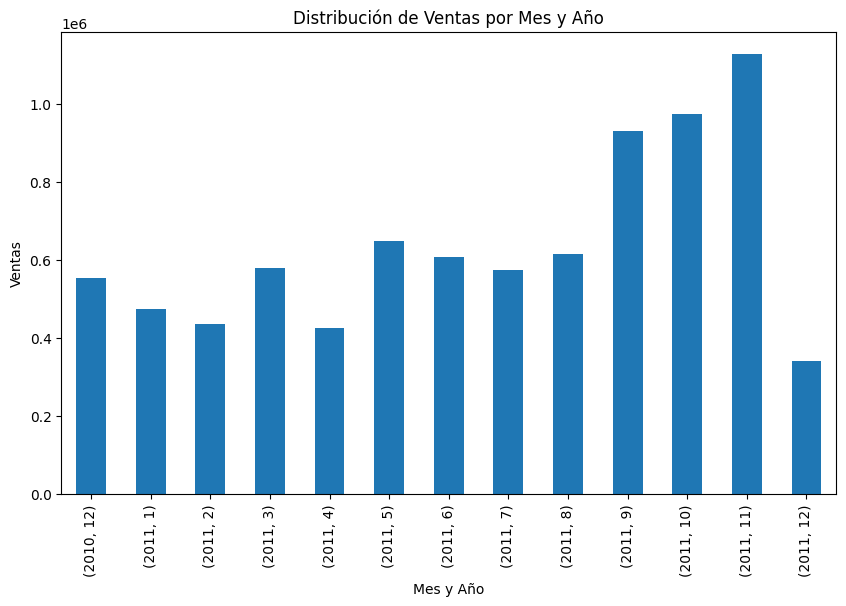

In [75]:
plt.figure(figsize=(10,6))
datos_limpios.groupby(['Año','Mes'])['Monto_total'].sum().plot(kind='bar')
plt.title('Distribución de Ventas por Mes y Año')
plt.xlabel('Mes y Año')
plt.ylabel('Ventas')
plt.show()

In [83]:
#DataFrame de top de productos vendidos por codigo de stock
Top_productos=datos_limpios.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
Top_productos=Top_productos.reset_index()
Top_productos=pd.merge(Top_productos, datos_limpios[['StockCode','Description']].drop_duplicates(),
on='StockCode', how='left')
print(Top_productos)

   StockCode  Quantity                         Description
0      84077     53119   WORLD WAR 2 GLIDERS ASSTD DESIGNS
1      22197     48689                SMALL POPCORN HOLDER
2      22197     48689                      POPCORN HOLDER
3     85099B     44963             JUMBO BAG RED RETROSPOT
4      84879     35215       ASSORTED COLOUR BIRD ORNAMENT
5     85123A     34185  WHITE HANGING HEART T-LIGHT HOLDER
6     85123A     34185  CREAM HANGING HEART T-LIGHT HOLDER
7      21212     33386     PACK OF 72 RETROSPOT CAKE CASES
8      23084     27045                  RABBIT NIGHT LIGHT
9      22492     25880             MINI PAINT SET VINTAGE 
10     22616     25305          PACK OF 12 LONDON TISSUES 
11     21977     24129  PACK OF 60 PINK PAISLEY CAKE CASES


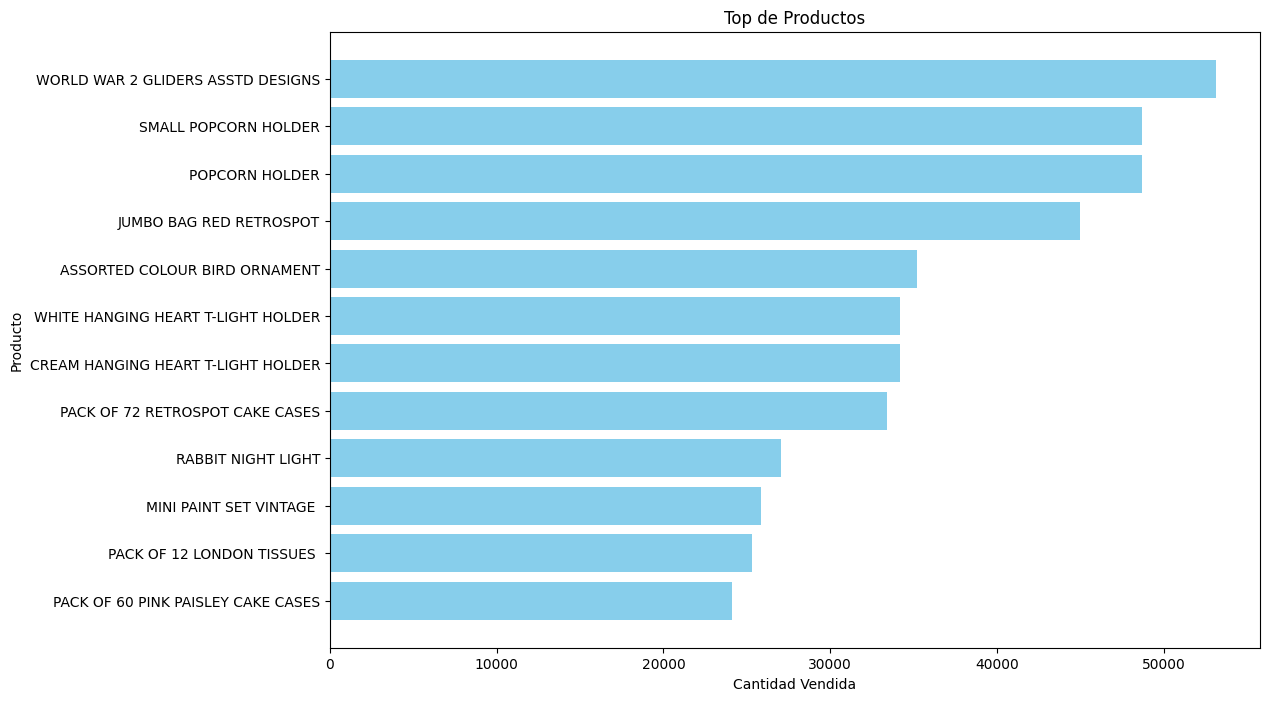

In [87]:
plt.figure(figsize=(12,8))
plt.barh(Top_productos['Description'],Top_productos['Quantity'],color='skyblue')
plt.title('Top de Productos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.gca().invert_yaxis()
plt.show()